# Hail Risk Calculation

In this project we are calculating hail risk for each postcode using hail data of last 100 years. Hail risk is calculated based on the hail size and the hail storm frequency.

In [11]:
#Import required libraries

import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

Input data used for the project is shapefile for postcode in Australia and the data for hail size and hail frequency is got from Bureau for Meteorology, Australia.

In [12]:
# load required data for the project

df = pd.read_csv(r"../01-inputfiles/Hail_Data.csv")
polygons = gpd.GeoDataFrame.from_file('../01-inputfiles/POA_2016_AUST.shp')

From hail lat/lon location point shapefile is created

In [13]:
# convert csv data into point shapefile based on latitude and lonngitude values

crs = {'init': 'epsg:4326'}

geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df,
                         crs = crs,
                         geometry = geometry)
geo_df.head()

C:\Users\Dhanraj\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Hail ID,Date,Time,Latitude,Longitude,Hail_size,Lookup,geometry
0,2,1795-12-04,2:00:00 PM,-33.8834,151.2167,2.0,-33.8834 151.2167,POINT (151.21670 -33.88340)
1,4,1812-02-17,2:00:00 PM,-33.8667,151.2000,6.5,-33.8667 151.2,POINT (151.20000 -33.86670)
2,6,1824-04-09,2:00:00 PM,-33.8667,151.2000,9.5,-33.8667 151.2,POINT (151.20000 -33.86670)
3,7,1829-01-13,2:00:00 AM,-33.8834,151.2167,2.5,-33.8834 151.2167,POINT (151.21670 -33.88340)
4,8,1829-10-21,3:00:00 AM,-33.8834,151.2167,2.0,-33.8834 151.2167,POINT (151.21670 -33.88340)


### Hail size per postcode

Using number of hail events and its size average hail size percode is calculated.

In [ ]:
# calulate average size of hail per postcode using historical hail data

# Read the data.
#polygons = gpd.GeoDataFrame.from_file('POA_2016_AUST.shp')
#points = gpd.GeoDataFrame.from_file('points.shp')

# Make a copy because I'm going to drop points as I
# assign them to polys, to speed up subsequent search.
pts1 = geo_df.copy() 

# We're going to keep a list of how many points we find.
pts_in_polys1 = []

# Loop over polygons with index i.
for i, poly in polygons.iterrows():

    # Keep a list of points in this poly
    pts_in_this_poly1 = []

    # Now loop over all points with index j.
    for j, pt in pts1.iterrows():
        if poly.geometry.contains(pt.geometry):
            # Then it's a hit! Add it to the list,
            # and drop it so we have less hunting.
            pts_in_this_poly1.append(pt.Hail_size)
            pts1 = pts1.drop([j])

    # We could do all sorts, like grab a property of the
    # points, but let's just append the number of them.
    pts_in_polys1.append(np.mean(pts_in_this_poly1))

# Add the number of points for each poly to the dataframe.
polygons['hail_size'] = gpd.GeoSeries(pts_in_polys1)


polygons['hail_size'] = polygons['hail_size'].fillna(0)

header = ["POA_CODE16", "POA_NAME16", "AREASQKM16", "hail_size"]
polygons.to_csv('../03-outputfiles/output.csv', columns = header)

polygons.head()

### Hail frequency per poscode

Using postcode shapefile and point data of hail, number of hail events per postcode is calculated.

In [15]:
# calculate hail frequency based on the number of hail events happened per postcode

# Read the data.
#polygons = gpd.GeoDataFrame.from_file('POA_2016_AUST.shp')
#points = gpd.GeoDataFrame.from_file('points.shp')

# Make a copy because I'm going to drop points as I
# assign them to polys, to speed up subsequent search.
pts = geo_df.copy() 

# We're going to keep a list of how many points we find.
pts_in_polys = []

# Loop over polygons with index i.
for i, poly in polygons.iterrows():

    # Keep a list of points in this poly
    pts_in_this_poly = []

    # Now loop over all points with index j.
    for j, pt in pts.iterrows():
        if poly.geometry.contains(pt.geometry):
            # Then it's a hit! Add it to the list,
            # and drop it so we have less hunting.
            pts_in_this_poly.append(pt.geometry)
            pts = pts.drop([j])

    # We could do all sorts, like grab a property of the
    # points, but let's just append the number of them.
    pts_in_polys.append(len(pts_in_this_poly))

# Add the number of points for each poly to the dataframe.
polygons['number of points'] = gpd.GeoSeries(pts_in_polys)


polygons.head()

C:\Users\Dhanraj\AppData\Local\Temp/ipykernel_2828/4044505528.py:33: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  polygons['number of points'] = gpd.GeoSeries(pts_in_polys)


,POA_CODE16,POA_NAME16,AREASQKM16,geometry,hail_size,number of points
0,0800,0800,3.1734,"POLYGON ((130.83454 -12.45798, 130.83395 -12.4...",0.0,0
1,0810,0810,23.7902,"POLYGON ((130.84711 -12.37754, 130.84726 -12.3...",0.0,0
2,0812,0812,35.8899,"POLYGON ((130.89192 -12.36879, 130.89221 -12.3...",0.0,0
3,0815,0815,0.6381,"POLYGON ((130.87240 -12.37655, 130.87235 -12.3...",0.0,0
4,0820,0820,39.0462,"POLYGON ((130.83499 -12.43006, 130.83508 -12.4...",0.0,0


In [47]:
# Calculate frequency per unit area from number of points per post code to the area in square meters

polygons["freq_per_area"] = polygons['number of points'] / polygons["AREASQKM16"]
polygons.head(10)
polygons["freq_per_area"].max()

18.40519026365435

In [38]:
# Save the extra columns in the CSV file

header = ["POA_CODE16", "POA_NAME16", "number of points", "AREASQKM16", "freq_per_area"]
polygons.to_csv('../03-outputfiles/output1.csv', columns = header)

In [39]:
# read the CSV files created above

df1 = pd.read_csv(r"../03-outputfiles/output.csv")
df2 = pd.read_csv(r"../03-outputfiles/output1.csv")

Normalized hail size and hail frequency is calculated (between 0 and 1) using average hail size per postcode.

In [40]:
# Calculate normalized hail size using the average hail size calulated per postcode

hail = df1["hail_size"]
normalized_hail=(hail-hail.min())/(hail.max()-hail.min())
normalized_hail

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2663    0.0
2664    0.0
2665    0.0
2666    0.0
2667    0.0
Name: hail_size, Length: 2668, dtype: float64

In [41]:
# Calculate normalized frequency per unit area size using the frequency per unit area calulated per postcode

freq_per_area = df2["freq_per_area"]
normalized_freq_per_area=(freq_per_area-freq_per_area.min())/(freq_per_area.max()-freq_per_area.min())
normalized_freq_per_area

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2687    0.0
2688    0.0
2689    0.0
2690    0.0
2691    0.0
Name: freq_per_area, Length: 2692, dtype: float64

hail risk is the average percentage of normalized hail size and normalized hail frequency per unit area.

In [43]:
# Total hail risk is the average percentage of the normalized hail size and normalilzed frequency per unit are of the postcode

total_risk = (normalized_freq_per_area + normalized_hail) / 2
total_risk = total_risk * 100
total_risk

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2687    NaN
2688    NaN
2689    NaN
2690    NaN
2691    NaN
Length: 2692, dtype: float64

In [44]:
df1["risk"] = total_risk
df1.head

<bound method NDFrame.head of       Unnamed: 0  POA_CODE16  POA_NAME16  AREASQKM16  hail_size  risk
0              0         800         800      3.1734        0.0   0.0
1              1         810         810     23.7902        0.0   0.0
2              2         812         812     35.8899        0.0   0.0
3              3         815         815      0.6381        0.0   0.0
4              4         820         820     39.0462        0.0   0.0
...          ...         ...         ...         ...        ...   ...
2663        2663        7466        7466     68.8166        0.0   0.0
2664        2664        7467        7467    144.0971        0.0   0.0
2665        2665        7468        7468    309.9843        0.0   0.0
2666        2666        7469        7469   5893.7056        0.0   0.0
2667        2667        7470        7470    108.0510        0.0   0.0

[2668 rows x 6 columns]>

In [45]:
df1.to_csv("../03-outputfiles/sample.csv", index=False)

In [32]:
polygons = polygons.merge(df2, on='AREASQKM16')

In [33]:
polygons.head()

,POA_CODE16_x,POA_NAME16_x,AREASQKM16,geometry,hail_size,number of points_x,freq_per_area_x,Unnamed: 0_x,POA_CODE16_y,POA_NAME16_y,number of points_y,freq_per_area_y,Unnamed: 0_y,POA_CODE16,POA_NAME16,number of points,freq_per_area,risk
0,0800,0800,3.1734,"POLYGON ((130.83454 -12.45798, 130.83395 -12.4...",0.0,0,0.0,0,800,800,0,0.0,0,800,800,0,0.0,0.0
1,0810,0810,23.7902,"POLYGON ((130.84711 -12.37754, 130.84726 -12.3...",0.0,0,0.0,1,810,810,0,0.0,1,810,810,0,0.0,0.0
2,0812,0812,35.8899,"POLYGON ((130.89192 -12.36879, 130.89221 -12.3...",0.0,0,0.0,2,812,812,0,0.0,2,812,812,0,0.0,0.0
3,0815,0815,0.6381,"POLYGON ((130.87240 -12.37655, 130.87235 -12.3...",0.0,0,0.0,3,815,815,0,0.0,3,815,815,0,0.0,0.0
4,0820,0820,39.0462,"POLYGON ((130.83499 -12.43006, 130.83508 -12.4...",0.0,0,0.0,4,820,820,0,0.0,4,820,820,0,0.0,0.0


Hail risk is the average percentage of normalized hail size and normalized hail frequency per unit area.

In the figure below hail risk is calculated per postcode and plotted for the whole Australia. Risk score is out of 100. More is the risk score more more hail will be there in that postcode

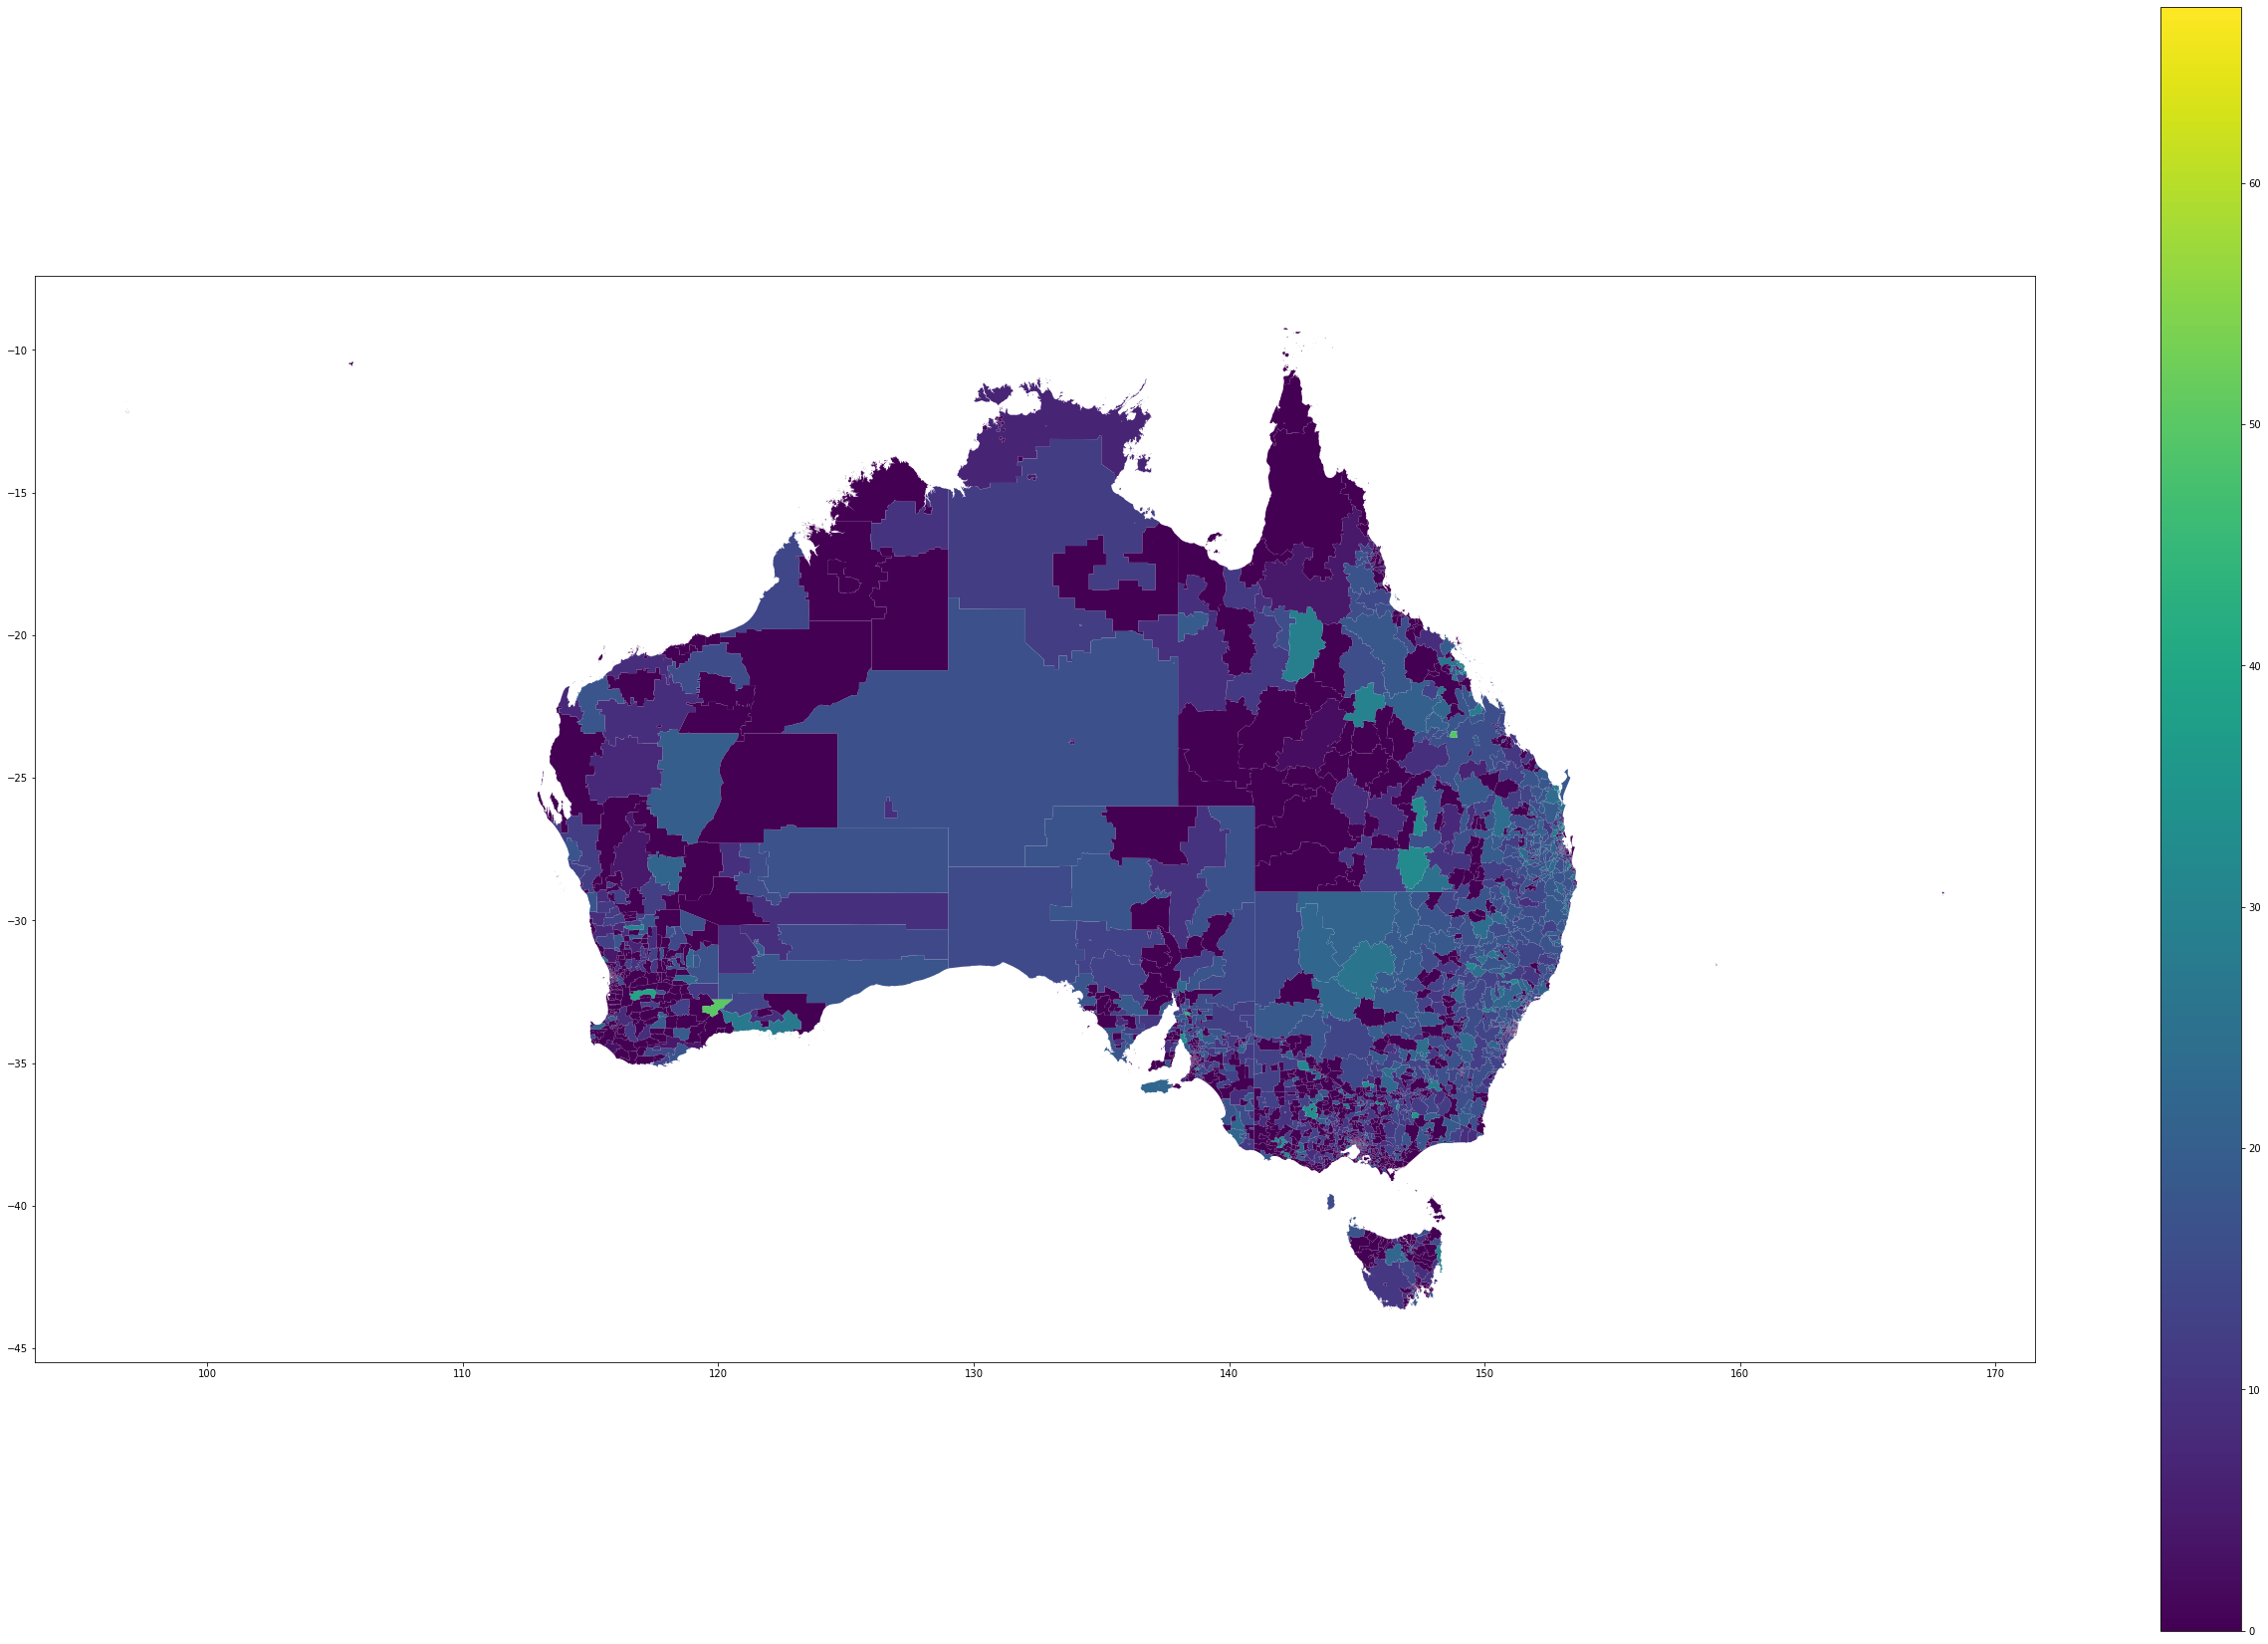

In [46]:
# Total risk is plotted per post code polygon


fig,ax = plt.subplots(figsize = (45, 30))
#aus_shp.plot(ax = ax)
polygons.plot('risk', ax = ax, legend=True)
plt.savefig('../04-figures/hail_risk.png')

In [35]:
# Final CSV file for the hail risk.

header = ["POA_CODE16_x", "POA_NAME16_x", "AREASQKM16", "number of points_y", "risk"]
polygons.to_csv('../03-outputfiles/final_risk_file.csv', columns = header)

In [ ]:
polygons.savefig('../04-figures/my_figure.png')